# The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) 

## Domain :- Data Science and Business Analytics

## Author :- Shadan Ansari

## Task 1 :- Prediction using Supervised ML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


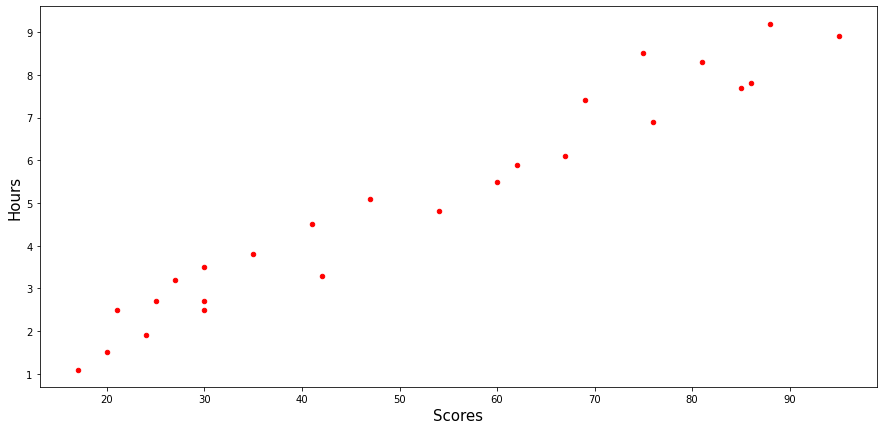

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
df.plot(kind = 'scatter',x = 'Scores', y = 'Hours',color = 'red')
plt.xlabel('Scores', fontsize = 15)
plt.ylabel('Hours', fontsize = 15)
plt.show()

In [8]:
df.corr(method = 'pearson')  # corr() function is basically used to describe the correlation between the two variables

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


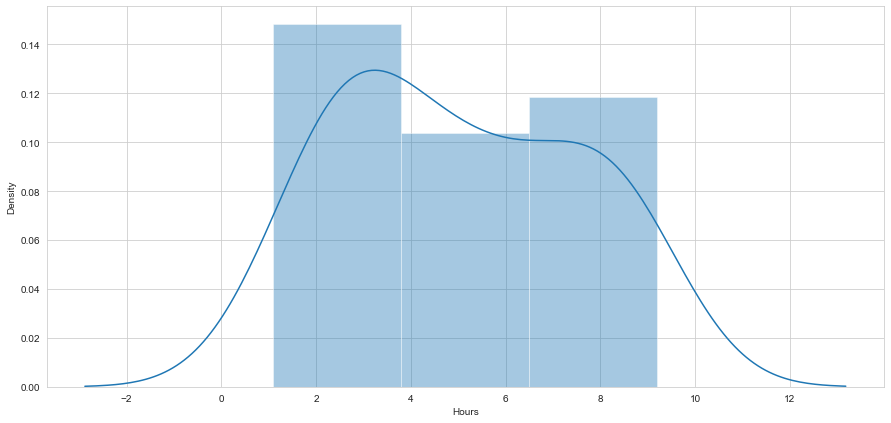

In [21]:
h = df["Hours"]
sns.distplot(h)

import warnings as wg
wg.filterwarnings("ignore")

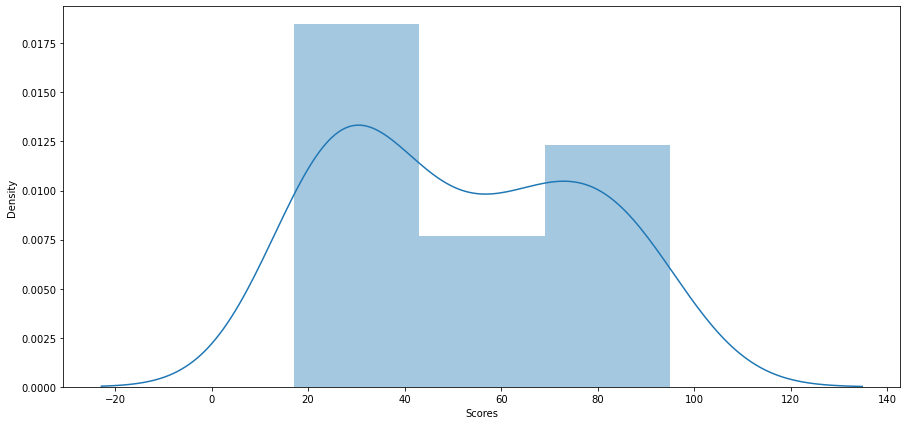

In [11]:
s = df['Scores']
sns.distplot(s)

import warnings as wg
wg.filterwarnings("ignore")

# Linear Regression

In [13]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

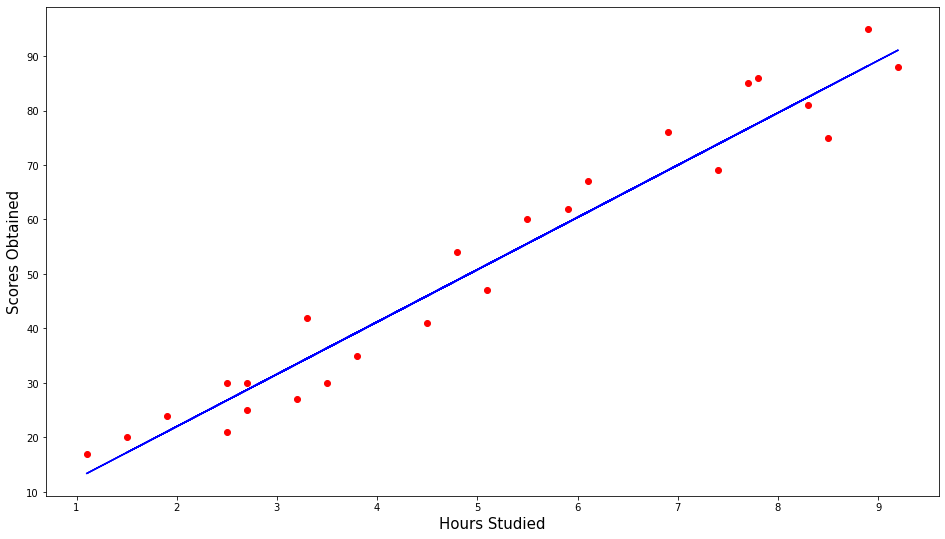

In [33]:
m = reg.coef_
c = reg.intercept_
line = m*x +c

plt.scatter(x,y, color= 'red')
plt.plot(x,line, color= 'blue')
plt.xlabel("Hours Studied", fontsize= 15)
plt.ylabel("Scores Obtained", fontsize= 15)
plt.show()



In [16]:
y_pred= reg.predict(x_test)

In [17]:
actual_predicted= pd.DataFrame({'Target': y_test, 'Predicted': y_pred})
actual_predicted

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


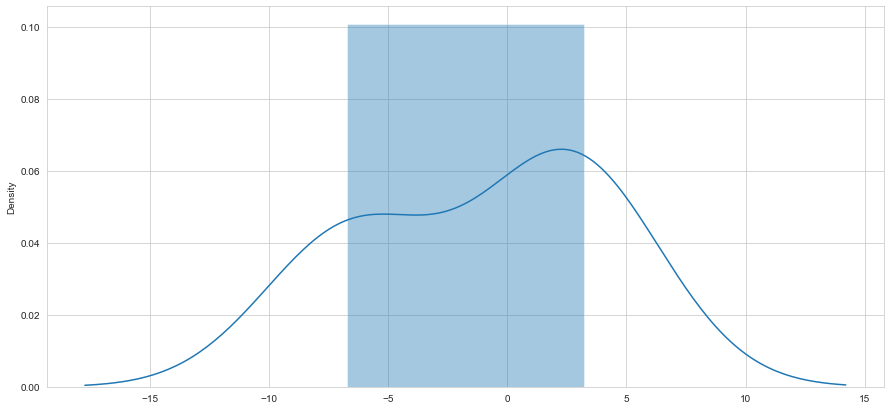

In [18]:
sns.set_style("whitegrid")
sns.distplot(np.array(y_test-y_pred))
plt.show()

import warnings as wg
wg.filterwarnings("ignore")

##  What would be predicted score if a student studies 9.25 hours/day ?

In [19]:
h = 9.25
s = reg.predict([[h]])
print("If a student studies for {} hours in a day then he/she will be score {}% in exam." .format(h,s))

If a student studies for 9.25 hours in a day then he/she will be score [93.69173249]% in exam.


## Model Evaluation

In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354
